In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Data/train.csv')

feature_names = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 
                 'Group', 'Collage', 'Human', 'Info', 'Blur']

X = df[feature_names]
y = df['Pawpularity']

print(df)

                                    Id  Subject Focus  Eyes  Face  Near  \
0     0007de18844b0dbbb5e1f607da0606e0              0     1     1     1   
1     0009c66b9439883ba2750fb825e1d7db              0     1     1     0   
2     0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1   
3     0018df346ac9c1d8413cfcc888ca8246              0     1     1     1   
4     001dc955e10590d3ca4673f034feeef2              0     0     0     1   
...                                ...            ...   ...   ...   ...   
9907  ffbfa0383c34dc513c95560d6e1fdb57              0     0     0     1   
9908  ffcc8532d76436fc79e50eb2e5238e45              0     1     1     1   
9909  ffdf2e8673a1da6fb80342fa3b119a20              0     1     1     1   
9910  fff19e2ce11718548fa1c5d039a5192a              0     1     1     1   
9911  fff8e47c766799c9e12f3cb3d66ad228              0     1     1     1   

      Action  Accessory  Group  Collage  Human  Occlusion  Info  Blur  \
0          0          0   

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
from sklearn.ensemble import BaggingClassifier

# Create a bagging classifier with the decision tree pipeline
bagging_classifier = BaggingClassifier(n_estimators=25, random_state=30)

# Train the bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(n_estimators=25, random_state=30)

In [4]:
# Make prediction on the testing data
y_pred = bagging_classifier.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         7
          17       0.00      0.00      0.00         0
          18       0.00    

c:\Users\chris\source\repos\Pawpularity\pawpularity-venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chris\source\repos\Pawpularity\pawpularity-venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chris\source\repos\Pawpularity\pawpularity-venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


base = DecisionTreeClassifier(criterion='gini', max_depth=10)
model_ada = AdaBoostClassifier(n_estimators=10, random_state=42, estimator=base)
model_ada.fit(X_train, y_train)

y_pred = model_ada.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         0
          13       0.04      0.11      0.06         9
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         0
          18       0.00    

c:\Users\chris\source\repos\Pawpularity\pawpularity-venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chris\source\repos\Pawpularity\pawpularity-venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chris\source\repos\Pawpularity\pawpularity-venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

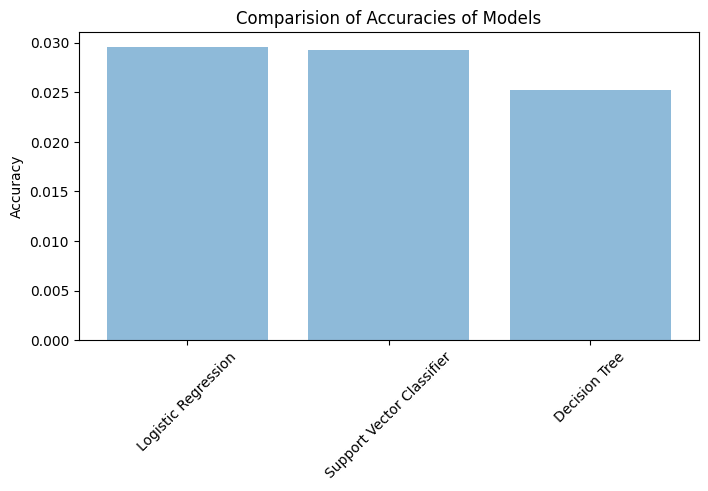

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


models = [('Logistic Regression', LogisticRegression()),
          ('Support Vector Classifier', SVC()),
          ('Decision Tree', DecisionTreeClassifier())]

accuracy_list = []

for model in models:
 model[1].fit(X_train, y_train)
 y_pred = model[1].predict(X_test)
 accuracy_list.append(accuracy_score(y_test, y_pred))
 
plt.figure(figsize=(8, 4))
model_names = [x[0] for x in models]
y_pos = range(len(models))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, [x[0] for x in models], rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()

In [7]:
from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(estimators=models,
final_estimator=LogisticRegression(), cv=5)
stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

print(accuracy_score(y_test, y_pred))




c:\Users\chris\source\repos\Pawpularity\pawpularity-venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\chris\source\repos\Pawpularity\pawpularity-venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\chris\source\repos\Pawpularity\pawpularity-venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\chris\source\repos\Pawpularity\pawpularity-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

0.028917283120376596
